Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
%matplotlib inline
%precision 16
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt

In [2]:
Name = "Yujing Zhang"
Collaborator = "Consult with TAs"

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 8:  Linear Algebra Part 2

## Question 1

We know that interpolation using equispaced points is not ideal but we can also show that it is ill-conditioned.  To illustrate this let $x_1, \ldots, x_n$ and $y_1, \ldots, y_m$ by $n$ and $m$ equispaced points from $-1$ to $1$ repectively.

**(a)** [10] Derive a formula for the $m \times n$ matrix $A$ that maps an $n$-vector of data at $\{x_j\}$ to an $m$-vector of sampled values $\{\mathcal{P}(y_j)\}$, where $\mathcal{P}$ is the degree $n-1$ polynomial interpolant of the data.

**Our Goal:**
$$\{x_i\}\stackrel{A}{\longrightarrow}\{\mathcal{P}(y_j)\}$$

**Step 1: Express $\{x_j\}$ and $\{\mathcal{P}(y_j)\}$**

Since $\mathcal{P}$ is the degree $n-1$ polynomial interpolant of the data. We have:

$$f(x_j) = 
\begin{bmatrix}
    f(x_1) \\
    f(x_2) \\
    \vdots \\
    f(x_n)
\end{bmatrix}
= 
\begin{bmatrix}
    1 & x_1 & x_1^2 & \cdots & x_1^{n-1} \\
    1 & x_2 & x_2^2 & \cdots & x_2^{n-1} \\
    \vdots & \vdots & \vdots & & \vdots \\
    1 & x_n & x_n^2 & \cdots & x_n^{n-1}
\end{bmatrix} \cdot \mathcal{p} = 
V_x\cdot \mathcal{p}$$, 

where $\mathcal{p}$ is a $n$-vector, and

$$\{\mathcal{P}(y_j)\} = 
\begin{bmatrix}
    1 & y_1 & y_1^2 & \cdots & y_1^{m-1} \\
    1 & y_2 & y_2^2 & \cdots & y_2^{m-1} \\
    \vdots & \vdots & \vdots & & \vdots \\
    1 & y_m & y_m^2 & \cdots & y_m^{m-1}
\end{bmatrix} \cdot \mathcal{P} = 
V_y\cdot \mathcal{P}$$

Now, we have
$$\{x_i\}\stackrel{A}{\longrightarrow}\{\mathcal{P}(y_j)\}$$
$$ V_x\cdot \mathcal{p} \stackrel{A}{\longrightarrow} V_y\cdot \mathcal{P}$$

**Step 2: The relationship between $\mathcal{p}$ and $\mathcal{P}$**

Since $x_1, \ldots, x_n$ and $y_1, \ldots, y_m$ are equispaced points from $-1$ to $1$, although they have different spaces, the interpolant of them of exactly the same, no matter the degree. Therefore, 

$$ \mathcal{p} = \mathcal{P}$$

**Step 3: Derive A**

$$
\mathop{A} \cdot \mathop{V_x}
=
\mathop{V_y}
$$

We know the Vandermonde matrix is invertible. Therefore,
$$\mathop{A} = \mathop{V_y}\cdot  \mathop{V_x^{-1}}$$

**(b)** [5]) Write a program to calculate $A$ and plot $||A||_\infty$ on a semilog scale for $n=1, 2, \ldots, 30$, $m=2n-1$.  In the continuous limit $m \rightarrow \infty$, the numbers $||A||_\infty$ are known as the Lebesgue constants for equispaced interpolation, which are asymptotic to $2^n / (e(n-1) \log n)$ as $n \rightarrow \infty$.

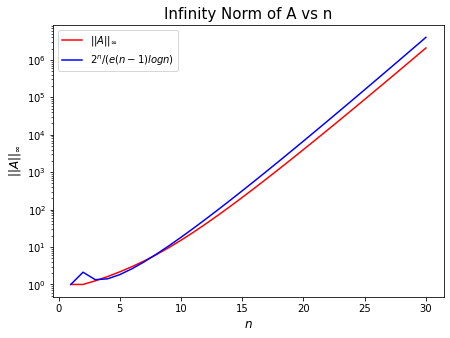

In [3]:
# YOUR CODE HERE
# raise NotImplementedError()
nlist = []
for i in range(1, 31):
    nlist.extend([i])

norm = []
asp = []
for n in range(1, 31):
    m = 2*n - 1
    x = numpy.linspace(-1, 1, n)
    y = numpy.linspace(-1, 1, m)
    Vx = numpy.ones((n, n))
    Vy = numpy.ones((m, n))
    for i in range(n):
        Vx[:, i] = x ** i
        Vy[:, i] = y ** i
    A = numpy.dot(Vy, numpy.linalg.inv(Vx))
    normA = numpy.linalg.norm(A, ord = numpy.inf)
    norm.extend([normA])
    if n == 1:
        asp.extend([1])
    else:
        asp.extend([2**n / (numpy.exp(1) * (n-1) * numpy.log(n))])

figure = plt.figure(figsize = (7, 5))
plt.xlabel("$n$", fontsize = 12)
plt.ylabel("$||A||_\infty$", fontsize = 12)
plt.title("Infinity Norm of A vs n", fontsize = 15)
plt.semilogy(nlist, norm, "r", nlist, asp, "b")
plt.legend(["$||A||_\infty$", "$2^n/(e(n-1)logn)$"])
plt.show()

**(c)** [10] Derive a general way to compute the $\infty$-norm condition number $\kappa$ of the problem of interpolating the function $f(x) = 1$.  Plot the result for $n=1,2,\ldots,30$ and $m=2n-1$.  Hint:  Use the expression we found involving the Jacobian.

By definition,

$$
    \kappa_\infty = \frac{||J(x)||_\infty}{||f(x)||_\infty ~/ ~||x||_\infty}
$$

Moreover, we know
$$f(x) = Ax= 1\quad \quad J(x) = f'(x) = A$$

Then, we compute the infinity norms.

1. For $||J(x)||$, 
$$||J(x)||_\infty = ||A||_\infty$$

2. For $||f(x)||$,
$$||f(x)||_\infty = 1$$

3. For $||x||$, since $x\in [-1, 1]$
$$||x||_\infty = 1$$

Therefore, 
$$\kappa_\infty = ||A||_\infty$$
which is exactly the same as question 2.

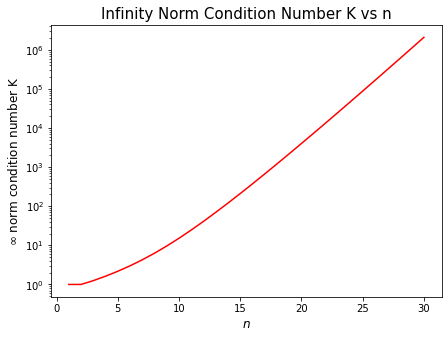

In [4]:
# YOUR CODE HERE
# raise NotImplementedError()
nlist = []
for i in range(1, 31):
    nlist.extend([i])

norm = []
asp = []
for n in range(1, 31):
    m = 2*n - 1
    x = numpy.linspace(-1, 1, n)
    y = numpy.linspace(-1, 1, m)
    Vx = numpy.ones((n, n))
    Vy = numpy.ones((m, n))
    for i in range(n):
        Vx[:, i] = x ** i
        Vy[:, i] = y ** i
    A = numpy.dot(Vy, numpy.linalg.inv(Vx))
    normA = numpy.linalg.norm(A, ord = numpy.inf)
    norm.extend([normA])
    if n == 1:
        asp.extend([1])
    else:
        asp.extend([2**n / (numpy.exp(1) * (n-1) * numpy.log(n))])

figure = plt.figure(figsize = (7, 5))
plt.xlabel("$n$", fontsize = 12)
plt.ylabel("$\infty$ norm condition number K", fontsize = 12)
plt.title("Infinity Norm Condition Number K vs n", fontsize = 15)
plt.semilogy(nlist, norm, "r")
plt.show()

## Question 2 - LU Factorization

Gaussian elimination is usually one of the first operations students learn in linear algebra but we seemed to have skipped it in lecture!  Let us fix that here in the homework.  Make sure to read the lecture on Gaussian elimination when doing this question.

**(a)** [10] By hand compute the $LU$ factorization of the matrix
$$
    A = \begin{bmatrix}
        4 & 8 & 1 \\
        8 & 20 & 4 \\
        16 & 36 & 7
    \end{bmatrix}.
$$
Make sure to compute all the way to the matrix $L$, not the components of the inverse.  You do not have to worry about pivoting.

**Solutions:**

To avoid using pivoting, we use elementary transformation of matrices:

Goal: $A = LU$

$$
    A = \begin{bmatrix}
        4 & 8 & 1 \\
        8 & 20 & 4 \\
        16 & 36 & 7
    \end{bmatrix}.
    =
    \begin{bmatrix}
        1 & 0 & 0 \\
        0 & 1 & 0 \\
        0 & 0 & 1
    \end{bmatrix} \cdot
    \begin{bmatrix}
        4 & 8 & 1 \\
        8 & 20 & 4 \\
        16 & 36 & 7
    \end{bmatrix}.
$$

Let $U_{21} = 0$, we set $R_2 - 2R_1$. Accordingly, we change the value of $A_{22}$ and $A_{23}$ to satisfy $A = LU$

$$
    A = 
    \begin{bmatrix}
        1 & 0 & 0 \\
        2 & 1 & 0 \\
        0 & 0 & 1
    \end{bmatrix} \cdot
    \begin{bmatrix}
        4 & 8 & 1 \\
        0 & 4 & 2 \\
        16 & 36 & 7
    \end{bmatrix}.
$$

Let $U_{31} = 0$, we set $R_3 - 4R_1$, Accordingly, we change the value of $A_{32}$ and $A_{33}$ to satisfy $A = LU$

$$
    A = 
    \begin{bmatrix}
        1 & 0 & 0 \\
        2 & 1 & 0 \\
        4 & 0 & 1
    \end{bmatrix} \cdot
    \begin{bmatrix}
        4 & 8 & 1 \\
        0 & 4 & 2 \\
        0 & 4 & 3
    \end{bmatrix}.
$$

Let $U_{32} = 0$, we set $R_3 - R_2$, Accordingly, we change the value of $A_{33}$ to satisfy $A = LU$

$$
    A = 
    \begin{bmatrix}
        1 & 0 & 0 \\
        2 & 1 & 0 \\
        4 & 1 & 1
    \end{bmatrix} \cdot
    \begin{bmatrix}
        4 & 8 & 1 \\
        0 & 4 & 2 \\
        0 & 0 & 1
    \end{bmatrix}.
$$

Therefore, we have

$$
    L = 
    \begin{bmatrix}
        1 & 0 & 0 \\
        2 & 1 & 0 \\
        4 & 1 & 1
    \end{bmatrix},
    U = 
    \begin{bmatrix}
        4 & 8 & 1 \\
        0 & 4 & 2 \\
        0 & 0 & 1
    \end{bmatrix}.
$$

**(b)** [10] Write a function that computes the $LU$ factorization of a given matrix $A \in \mathbb R^{n \times n}$ without using `numpy` or `scipy` packages.  Make sure to also return the pivoting matrix, i.e. compute the matrices $P$, $L$, and $U$ where
$$
    P A = L U.
$$
Note that the provided function `swap_rows` may be useful although you do not have to use it.  You may also want to use the example in the notes to test your basic algorithm with (i.e. `A = numpy.array([[2, 1, 1, 0], [4, 3, 3, 1], [8, 7, 9, 5], [6, 7, 9, 8]], dtype=float)` noting that the algorithm will complain without the casting to `float`).

In [5]:
def swap_rows(i, j, A, column_indices=None):
    r"""
    Swap the ith and jth rows of the matrix A in place
    
    Optional argument column_indices is a tuple that controls 
    the columns being swapped.  Defaults to the entire row.
    """
    if column_indices is None:
        column_indices = (0, A.shape[0])
    
    pivot_row = A[i, column_indices[0]:column_indices[1]].copy()
    A[i, column_indices[0]:column_indices[1]] = A[j, column_indices[0]:column_indices[1]]
    A[j, column_indices[0]:column_indices[1]] = pivot_row
    
    return A[j, column_indices[0]:column_indices[1]]

def LU_factorization(A):
    # YOUR CODE HERE
    # raise NotImplementedError()
    """
    U = A
    L = I
    P = I
    for k = 1 to m - 1
        Select i >= k to maximize |u_{i,k}|
        U[k, k:m] <==> U[i, k:m]
        L[k, 1:k-1] <==> L[i, 1:k-1]
        P[k, :] <==> P[i, :]
        for j = k + 1 to m
            L[j, k] = U[j, k] / U[k, k]
            U[j, k:m] = U[j, k:m] - L[j, k] * U[k, k:m]
    """
    m = len(A)
    U = A.copy()
    L = numpy.identity(len(A))
    P = numpy.identity(len(A))
    
    for k in range(0, m):
        i = numpy.argmax(numpy.abs(U[k:m, k]))
        i += k
        swap_rows(i, k, U,[k, m])
        swap_rows(i, k, L,[0, k])
        swap_rows(i, k, P)
        for j in range(k + 1, m):
            L[j, k] = U[j, k] / U[k, k]
            U[j, k:m] = U[j, k:m] - L[j, k] * U[k, k:m]              # U is updated for each time
    
    return P, L, U

In [6]:
import scipy.linalg
# A = numpy.array([[2, 1, 1, 0], [4, 3, 3, 1], [8, 7, 9, 5], [6, 7, 9, 8]], dtype=float)
A = numpy.random.uniform(low=1.0, high=10.0, size=(25, 25))
P, L, U = LU_factorization(A)
P_s, L_s, U_s = scipy.linalg.lu(A)
numpy.testing.assert_allclose(P, numpy.linalg.inv(P_s))
numpy.testing.assert_allclose(L, L_s)
numpy.testing.assert_allclose(U, U_s, atol=1e-8)
print("Success!")

Success!


**(c)** [10] For this question write a function that solves the system $A x = b$ given an $A$ and $b$ using your $LU$ factorization function and the pivot matrix.  Again do not use any of the functions from `numpy` or `scipy` other than to check your solution.

In [7]:
def solve(A, b):
    # YOUR CODE HERE
    # raise NotImplementedError()
    """
    PA = LU
    Ly = Pb, forward
    Ux = y, backward
    """
    P, L, U = LU_factorization(A)
    x = numpy.zeros(len(U))
    y = numpy.zeros(len(L))
    Pb = numpy.dot(P, b)
    m = len(A)
    
    for i in range(0, m):
        Ly = 0
        for j in range(0, i):
            Ly += L[i,j] * y[j]
        y[i] = Pb[i] - Ly
    
    for i in range(1, m + 1):
        Ux = 0
        for j in range(1, i):
            Ux += U[m - i, m - j] * x[m - j]          
        x[m - i] = (y[m - i] - Ux) / U[m - i, m - i]
    
    return x

In [8]:
m = 10
A = numpy.random.uniform(size=(m, m))
b = numpy.random.uniform(size=(m))
x = solve(A, b)
x_n = numpy.linalg.solve(A, b)
numpy.testing.assert_allclose(x, x_n)
print("Success!")

Success!


## Question 3

Consider the system of equations $Ax = b$ defined by
$$A = \begin{bmatrix}
        0.780 & 0.563 \\
        0.913 & 0.659 
    \end{bmatrix}
    \quad \text{and} \quad 
    b = \begin{bmatrix}
        0.217 \\
        0.254 
    \end{bmatrix}.
$$
The true solution of this system is $$x^T = [1, -1]$$.  Consider for the following questions the approximate solutions
$$
    x^T_1 = [0.999, -1.001] \quad \text{and} \quad x^T_2 = [0.341, -0.087]
$$
and define the residual $r(y)$ as
$$
    r(y) = b - A y.
$$

**(a)** [10] Compute the residuals (you may use `numpy`) $||r(x_1)||$ and $||r(x_2)||$ for the two approximate solutions using a couple of different norms.  Does the more accurate solution have a smaller residual?  Does it matter which norm you use?

In [9]:
# YOUR CODE HERE
# raise NotImplementedError()
A = numpy.array([[0.780, 0.563], [0.913, 0.659]])
b = numpy.array([[0.217], [0.254]])
x1 = numpy.array([[0.999],[-1.001]])
x2 = numpy.array([[0.341],[-0.087]])
x = numpy.array([[1], [-1]])

r1 = b - numpy.dot(A, x1)
r2 = b - numpy.dot(A, x2)

print("The residual for x1 is:\n{}".format(r1))
print()
print("The residual for x2 is:\n{}".format(r2))
print()

norm_r1_ord1 = numpy.linalg.norm(r1, ord = 1)
norm_r1_ord2 = numpy.linalg.norm(r1, ord = 2)
norm_r1_ordn1 = numpy.linalg.norm(r1, ord = -1)
norm_r1_ordn2 = numpy.linalg.norm(r1, ord = -2)
norm_r1_ordinfty = numpy.linalg.norm(r1, ord = numpy.inf)

norm_r2_ord1 = numpy.linalg.norm(r2, ord = 1)
norm_r2_ord2 = numpy.linalg.norm(r2, ord = 2)
norm_r2_ordn1 = numpy.linalg.norm(r2, ord = -1)
norm_r2_ordn2 = numpy.linalg.norm(r2, ord = -2)
norm_r2_ordinfty = numpy.linalg.norm(r2, ord = numpy.inf)


print("1-Norm for x1 is: {}". format(norm_r1_ord1))
print("1-Norm for x2 is: {}". format(norm_r2_ord1))
print()
print("2-Norm for x1 is: {}". format(norm_r1_ord2))
print("2-Norm for x2 is: {}". format(norm_r2_ord2))
print()
print("-1-Norm for x1 is: {}". format(norm_r1_ordn1))
print("-1-Norm for x2 is: {}". format(norm_r2_ordn1))
print()
print("-2-Norm for x1 is: {}". format(norm_r1_ordn2))
print("-2-Norm for x2 is: {}". format(norm_r2_ordn2))
print()
print("Infinity-Norm for x1 is: {}". format(norm_r1_ordinfty))
print("Infinity-Norm for x2 is: {}". format(norm_r2_ordinfty))

The residual for x1 is:
[[0.0013429999999999]
 [0.001572          ]]

The residual for x2 is:
[[9.99999999945489e-07]
 [0.00000000000000e+00]]

1-Norm for x1 is: 0.0029149999999999177
1-Norm for x2 is: 9.99999999945489e-07

2-Norm for x1 is: 0.002067566927574483
2-Norm for x2 is: 9.99999999945489e-07

-1-Norm for x1 is: 0.0029149999999999177
-1-Norm for x2 is: 9.99999999945489e-07

-2-Norm for x1 is: 0.002067566927574483
-2-Norm for x2 is: 9.99999999945489e-07

Infinity-Norm for x1 is: 0.0015720000000000178
Infinity-Norm for x2 is: 9.99999999945489e-07


**Solutions:**
1. Although $x_1$ looks like more close to true solution, by calculating the residuals, we know that $x_2$ is a better approxiamation.
2. The **more accurate** solution is, the **smaller residual**, which doesn't matter the order of norms we choose.

**(b)** [10] Compute $||A||$, $||A^{-1}||$ and the condition number $\kappa(A)$ of the matrix using the $L_2$ and $L_\infty$ norms.  Again you can use `numpy`.

In [10]:
# YOUR CODE HERE
# raise NotImplementedError()

A_inv = numpy.linalg.inv(A)

norm_A_ord2 = numpy.linalg.norm(A, ord = 2)
norm_A_ordinfty = numpy.linalg.norm(A, ord = numpy.inf)
norm_A_inv_ord2 = numpy.linalg.norm(A_inv, ord = 2)
norm_A_inv_ordinfty = numpy.linalg.norm(A_inv, ord = numpy.inf)

K2 = norm_A_ord2 * norm_A_inv_ord2
Kinf = norm_A_ordinfty * norm_A_inv_ordinfty

print("2-Norm for A is: {}". format(norm_A_ord2))
print("Infinity-Norm for A is: {}". format(norm_A_ordinfty))
print()
print("2-Norm for A_inv is: {}". format(norm_A_inv_ord2))
print("Infinity-Norm for A_inv is: {}". format(norm_A_inv_ordinfty))
print()
print("2-Condition Numver for A is: {}". format(K2))
print("Infinity-Condition Numver for A is: {}". format(Kinf))

2-Norm for A is: 1.4809520586432041
Infinity-Norm for A is: 1.572

2-Norm for A_inv is: 1480952.0584615201
Infinity-Norm for A_inv is: 1692999.9997923018

2-Condition Numver for A is: 2193218.999730479
Infinity-Condition Numver for A is: 2661395.9996734983


**(c)** [15] Explain the behavior from part (a) using the results of part (b) discussing how condition numbers play a role in the problem above.  Hint:  Think about the problem where only the vector $x$ is perturbed by some small amount $\delta x$

**Let's do this question in 4 steps:**

**Step 1: The definition of $e$ and the expression of $r$**

Define
$$e = x - \hat{x}$$

Therefore, 
$$r = b - Ax = b - A(x-e) = Ae$$

**Step 2: The expression of $K$**

By definition,

$$K = \sup_{\delta x} \left( \frac{\frac{||\delta r||_2}{||r||_2}}{\frac{||\delta x||_2}{||x||_2}} \right)$$

where
$$\delta_r = r(x + \delta_x) + r(x) = [b - A(x+ \delta_x)] - (b - Ax) = -A\delta_x$$

Then,
$$K = \sup_{\delta x} \frac{||A\delta x ||_2\cdot ||x||_2}{||Ae||_2\cdot ||\delta x||_2}$$

Since $$||A \delta x||_2 \leq ||A||_2 \cdot ||e||_2$$

$$K \geq \sup_{\delta x} \frac{||A|| \cdot ||\delta x||_2\cdot ||x||_2}{||Ae||_2\cdot ||\delta x||_2}=
\sup_{\delta x} \frac{||A|| \cdot ||x||_2}{||Ae||_2} \geq \frac{||x||_2}{||e||_2}
$$

So, the lower bound of $K$ is $\frac{||x||_2}{||e||_2}$.

**Step 3: Compute the 2-norm of e and condition number of x for $x_1$ and $x_2$**

In [11]:
# compute 
A = numpy.array([[0.780, 0.563], [0.913, 0.659]])
b = numpy.array([[0.217], [0.254]])
x1 = numpy.array([[0.999],[-1.001]])
x2 = numpy.array([[0.341],[-0.087]])
x = numpy.array([[1], [-1]])

r1 = b - numpy.dot(A, x1)
r2 = b - numpy.dot(A, x2)

e1 = x - x1
e2 = x - x2

print("The Norm of x is: {}".format(numpy.linalg.norm(x, ord = 2)))
print()
print("The Norm of e1 is: {}".format(numpy.linalg.norm(e1, ord = 2)))
print("The Norm of e2 is: {}".format(numpy.linalg.norm(e2, ord = 2)))

The Norm of x is: 1.4142135623730951

The Norm of e1 is: 0.0014142135623730178
The Norm of e2 is: 1.1259884546477374


**Step 4: Explanation**

Since the norm of x is fixed, 
$$2-norm_x = 1.4142135623730951$$
And the norm of $e_1$ is much smaller than $e_2$.

According the our calculation,
The condition number of $x_1$ is much larger than $x_2$, so $x_1$ is harder to compute. Therefore, the residuals of $x_1$ is bigger.

The above conclusion can be verified by the following codes:

In [12]:
# compute 
A = numpy.array([[0.780, 0.563], [0.913, 0.659]])
b = numpy.array([[0.217], [0.254]])
x1 = numpy.array([[0.999],[-1.001]])
x2 = numpy.array([[0.341],[-0.087]])
x = numpy.array([[1], [-1]])

r1 = b - numpy.dot(A, x1)
r2 = b - numpy.dot(A, x2)

e1 = x - x1
e2 = x - x2

print("The Condition Number of x1 is:{}".format(numpy.linalg.norm(x, 2) / numpy.linalg.norm(e1, ord = 2)))
print("The Condition Number of x2 is:{}".format(numpy.linalg.norm(x, 2) / numpy.linalg.norm(e2, ord = 2)))

The Condition Number of x1 is:1000.0000000000547
The Condition Number of x2 is:1.2559751892087812
